In [1]:
# importing necessary libraries

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
import scipy
import PIL.Image
from lr_utils import load_dataset 	
from scipy import ndimage

%matplotlib inline

## Packages used 
--> [numpy](https://numpy.org/doc/stable/) is the fundamental package for scientific computing with Python.

--> [h5py](https://pypi.org/project/h5py/) is a common package to interact with a dataset that is stored on an H5 file.

--> [matplotlib](https://pypi.org/project/matplotlib/) is a famous library to plot graphs in Python.

--> [PIL](https://pillow.readthedocs.io/en/stable/) and [scipy](https://docs.scipy.org/doc/scipy/) are used here to test your model with your own picture at the end.

If you want to read more about the packages you can click on the external link tags

## Loading the Dataset
You can download the dataset from here : [Dataset](https://www.kaggle.com/datasets/muhammeddalkran/catvnoncat)

In [2]:
with h5py.File('C:/Users/sahre/OneDrive/Documents/catvnoncat/train_catvnoncat.h5', "r") as train_dataset:
    data_array = np.array(train_dataset)
    print('=')
    l = lambda : [print(_,'/n') for _ in data_array]
    l()
    
        

=
list_classes /n
train_set_x /n
train_set_y /n


In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

### Exercise:
 Find the values for: - m_train (number of training examples) - m_test (number of test examples) - num_px (= height = width of a training image) Remember that train_set_x_orig is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access m_train by writing train_set_x_orig.shape[0].

In [4]:
print(f'number of m_train(training examples): {train_set_x_orig.shape[0]}')
print(f'height of a single training image: {train_set_x_orig.shape[1]}')
print(f'width of a single training image:{train_set_x_orig.shape[2]}')
print(f'number of channels: {train_set_x_orig.shape[3]},(rgb)')
print(f'shape of training set: {train_set_x_orig.shape}')

number of m_train(training examples): 209
height of a single training image: 64
width of a single training image:64
number of channels: 3,(rgb)
shape of training set: (209, 64, 64, 3)


y = [1], it's a 'cat' picture.


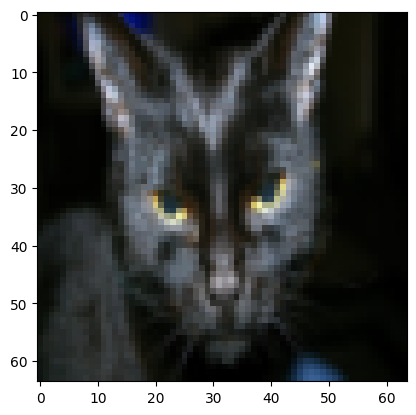

In [5]:
# displaying an image
index=25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")


In [6]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

In [7]:
print(train_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_x_orig.shape)
print(test_set_y.shape)

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)


In [8]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [9]:
print(train_set_x_flatten.shape)
print(train_set_y.shape)
print(test_set_x_flatten.shape)
print(test_set_y.shape)

(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


In [10]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [11]:
# declaring a sigmoid function in which we are going to pass a linear function afterwards

def sigmoid(z):
    s= 1/(1+np.exp(-z))
    return s

# initializing the parameters

In [12]:
def initialize_params(dim):
    w = np.zeros(shape=(dim,1))
    b = 0
    assert(w.shape==(dim,1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [13]:
dim = 2
w, b = initialize_params(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


# forward and backward propagation

In [14]:
def propagate(w,b,X,Y):
    m = X.shape[1]

    # Forward Propagation
    A = sigmoid(np.dot(w.T,X)+b)
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*(np.log(1-A)))


    # Back Propagation
    dw = (1/m)*np.dot(X, (A-Y).T)
    db = (1/m)*np.sum(A-Y)

    # checking if the conditions below return the boolean True
    assert(dw.shape==w.shape)
    assert(db.dtype==float)
    cost = np.squeeze(cost)
    assert(cost.shape==())

    grads = {'dw': dw,
             'db': db}
    
    return grads, cost

In [15]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


# optimization

In [16]:
def optimization(w,b,X,Y, num_iterations, learning_rate, print_cost=False):
    costs = []

    for _ in range(num_iterations):
        grads, cost = propagate(w,b,X,Y)

        dw = grads['dw']
        db = grads['db']

        # updating the weight and bias
        w = w-learning_rate*dw
        b = b-learning_rate*db

        if _%100 == 0:
            costs.append(cost)
        
        if print_cost and _%100==0:
            print(f'Cost after iteration {_}: {cost}')

    params = {'w':w,
              'b':b}
    grads = {'dw':dw,
             'db':db}
    
    return params, grads, costs

In [17]:
params, grads, costs = optimization(w,b, X, Y, num_iterations=100, learning_rate=0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [18]:
def prediction(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros(shape=(1,m))
    w = w.reshape(X.shape[0],1)

    A = sigmoid(np.dot(w.T,X)+b)

    for _ in range(A.shape[1]):
        Y_prediction[0, _] = 1 if A[0, _] > 0.5 else 0

    assert(Y_prediction.shape==(1,m))
    return Y_prediction

In [19]:
print('prediction = '+str(prediction(w,b,X)))

prediction = [[1. 1.]]


In [20]:
# merge all fn's now into a model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):

    w, b = initialize_params(X_train.shape[0])

    params , grads, costs = optimization(w,b,X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = params['w']
    b = params['b']

    Y_prediction_test = prediction(w,b,X_test)
    Y_prediction_train = prediction(w,b,X_train)

    print(f'train accuracy{100-np.mean(np.abs(Y_prediction_train-Y_train))*100}%')
    print(f'test accuracy{100-np.mean(np.abs(Y_prediction_test-Y_test))*100}%')

    d = {'costs':costs,
         'Y_prediction_test': Y_prediction_test,
         'Y_prediction_train': Y_prediction_train,
         'w':w,
         'b':b,
         'learning_rate': learning_rate,
         'num_iterations': num_iterations}

    return d

In [21]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=20000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.8239208681601369
Cost after iteration 200: 0.41894372058616236
Cost after iteration 300: 0.6173497063912884
Cost after iteration 400: 0.522115767197924
Cost after iteration 500: 0.3877087459646933
Cost after iteration 600: 0.23625445652290003
Cost after iteration 700: 0.15422213305621676
Cost after iteration 800: 0.1353278283265459
Cost after iteration 900: 0.12497148001124604
Cost after iteration 1000: 0.11647833126181911
Cost after iteration 1100: 0.10919251128427583
Cost after iteration 1200: 0.10280446418273667
Cost after iteration 1300: 0.09712981007882818
Cost after iteration 1400: 0.09204326923447784
Cost after iteration 1500: 0.08745251991513217
Cost after iteration 1600: 0.08328603053341713
Cost after iteration 1700: 0.07948657037494224
Cost after iteration 1800: 0.07600734571751612
Cost after iteration 1900: 0.07280949458176567
Cost after iteration 2000: 0.06986035604674598
Cost after iteration 2100: 0.067

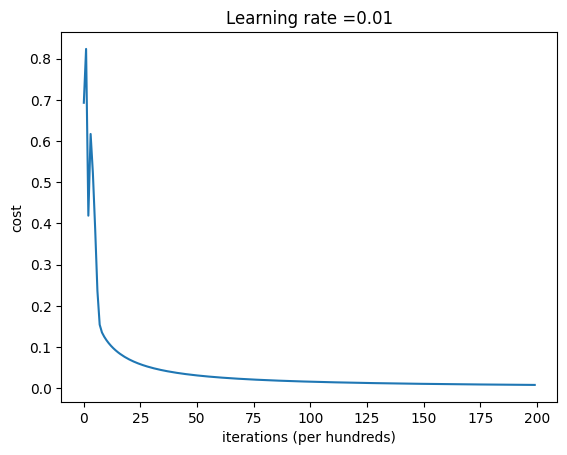

In [22]:
# ploting learning curve (withs costs)

costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Learning rate =' + str(d['learning_rate']))
plt.show()

learning rate is: 0.01
train accuracy100.0%
test accuracy72.0%
/n-------------------------------------------------------/n
learning rate is: 0.001
train accuracy98.08612440191388%
test accuracy70.0%
/n-------------------------------------------------------/n
learning rate is: 0.0001
train accuracy84.21052631578948%
test accuracy60.0%
/n-------------------------------------------------------/n


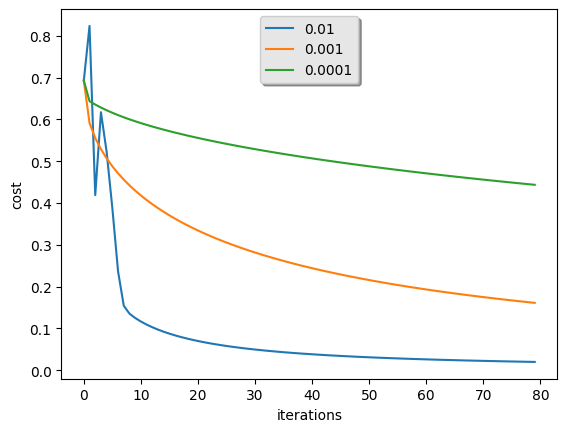

In [23]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 8000, learning_rate = i, print_cost = False)
    print ('/n' + "-------------------------------------------------------" + '/n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [25]:
from PIL import Image

In [26]:
my_image = Image.open('pexels-just-a-couple-photos-3777622.jpg')
my_image_prime = np.array(Image.open("10008.jpg")).reshape(num_px*num_px*3,1)


y = 1.0, your algorithm predicts a "cat" picture.


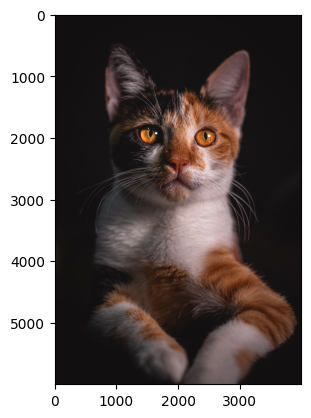

In [27]:
my_predicted_image = prediction(d["w"], d["b"], my_image_prime)
plt.imshow(my_image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

In [28]:
train_s_ex = train_set_x_orig[10].reshape((num_px*num_px*3,1))

C:\Users\sahre\AppData\Local\Temp\ipykernel_1284\2287865628.py:4: RuntimeWarning: overflow encountered in exp
  s= 1/(1+np.exp(-z))


y = 0.0, your algorithm predicts a "non-cat" picture.


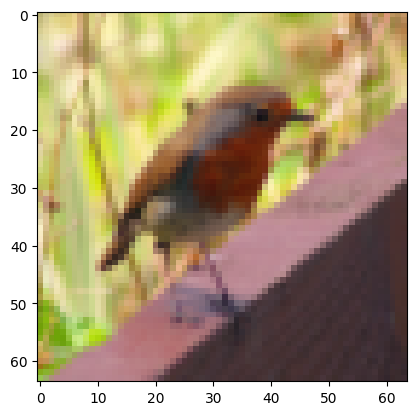

In [29]:
my_predicted_image = prediction(d["w"], d["b"], train_s_ex)
plt.imshow(train_set_x_orig[10])
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")